In [1]:
import pandas as pd
df_Y = pd.read_excel("C:/Users/User/Downloads/整理完成/整理完成/會掉血壓名單/10.xls")
df_Y = df_Y.drop(['PAT_NO','BED_NO','REC_DATE','ISALARM', 'AK_STATUS','ALERT_EDITNO','ALERT_EDITOR','ALERT_EDITTIME','REMARK',
                  'OP_ID','VIP_IP','UDATE','DATA_TIME','FINISH_TIME','EDITOR_EMPNO','SERIALNUM','DEVICE_MODEL','CANCEL_FLAG',
                  'SIMPLE','TOTAL_UF','ANTICOAGULANTS','EMRRECNO','CANCEL_USER'], axis=1)
for i in range(1,9):
    df_y = pd.read_excel("C:/Users/User/Downloads/整理完成/整理完成/會掉血壓名單/0" + str(i) + ".xls")
    df_y = df_y.drop(['PAT_NO','BED_NO','REC_DATE','ISALARM', 'AK_STATUS','ALERT_EDITNO','ALERT_EDITOR','ALERT_EDITTIME','REMARK'
                      ,'OP_ID','VIP_IP','UDATE','DATA_TIME','FINISH_TIME','EDITOR_EMPNO','SERIALNUM','DEVICE_MODEL','CANCEL_FLAG',
                      'SIMPLE','TOTAL_UF','ANTICOAGULANTS','EMRRECNO','CANCEL_USER'], axis=1)
    df_Y = df_Y.append(df_y)
df_Y['label'] = 1.0

In [2]:
import pandas as pd
df_N = pd.read_excel("C:/Users/User/Downloads/整理完成/整理完成/不會掉血壓名單/10.xls")
df_N = df_N.drop(['PAT_NO','BED_NO','REC_DATE','ISALARM', 'AK_STATUS','ALERT_EDITNO','ALERT_EDITOR','ALERT_EDITTIME','REMARK'
                  ,'OP_ID','VIP_IP','UDATE','DATA_TIME','FINISH_TIME','EDITOR_EMPNO','SERIALNUM','DEVICE_MODEL','CANCEL_FLAG',
                  'SIMPLE','TOTAL_UF','ANTICOAGULANTS','EMRRECNO','CANCEL_USER'], axis=1)
for i in range(1,9):
    df_n = pd.read_excel("C:/Users/User/Downloads/整理完成/整理完成/不會掉血壓名單/0" + str(i) + ".xls")
    df_n = df_n.drop(['PAT_NO','BED_NO','REC_DATE','ISALARM', 'AK_STATUS','ALERT_EDITNO','ALERT_EDITOR','ALERT_EDITTIME','REMARK'
                      ,'OP_ID','VIP_IP','UDATE','DATA_TIME','FINISH_TIME','EDITOR_EMPNO','SERIALNUM','DEVICE_MODEL','CANCEL_FLAG',
                      'SIMPLE','TOTAL_UF','ANTICOAGULANTS','EMRRECNO','CANCEL_USER'], axis=1)
    df_N = df_N.append(df_n)
df_N['label'] = 0.0

In [3]:
df_train = df_Y.append(df_N)
df_train['MAX_BLOOD'] = pd.to_numeric(df_train['MAX_BLOOD'],'coerce')
df_train['MIN_BLOOD'] = pd.to_numeric(df_train['MIN_BLOOD'],'coerce')
df_train['PULSE'] = pd.to_numeric(df_train['PULSE'],'coerce')
df_train = df_train.fillna(0)
df_train

,BLOOD_FLOW,CONDUCTIVITY,VENOUS,DIALYSATE,TEMP,MAX_BLOOD,MIN_BLOOD,PULSE,NS,BLOOD_FUN,...,SYRINGE_FLOW,TMP,MANUAL_INPUT,TARGET_UF,UF,SYRINGE_FLOW_RATE,TIMES,DIA_FLOW,BREATH,label
0,199.3,14.47,86.6,0.0,36.58,114.0,60.0,67.0,0.0,2.0,...,0.0,23.0,0.0,2.4,0.753,1.0,1.0,499.7,17.0,1.0
1,199.1,14.57,87.6,0.0,36.38,114.0,60.0,67.0,0.0,0.0,...,0.0,21.2,1.0,2.4,1.003,1.0,12.0,499.9,0.0,1.0
2,199.2,14.45,87.1,0.0,36.39,116.0,63.0,65.0,0.0,0.0,...,0.0,21.3,0.0,2.4,0.990,1.0,15.0,500.5,0.0,1.0
3,199.2,14.56,88.1,0.0,36.41,117.0,55.0,65.0,0.0,0.0,...,0.0,22.3,0.0,2.4,0.951,1.0,30.0,500.3,0.0,1.0
4,199.1,14.52,91.3,0.0,36.40,115.0,55.0,60.0,0.0,0.0,...,0.0,22.2,0.0,2.4,0.912,1.0,45.0,500.1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49887,268.0,14.00,160.0,0.0,37.30,147.0,75.0,64.0,0.0,0.0,...,0.0,76.0,0.0,2.2,0.000,1.0,237.0,467.0,0.0,0.0
49888,155.0,14.10,136.0,0.0,37.30,147.0,75.0,64.0,0.0,0.0,...,0.0,70.0,0.0,2.2,0.000,1.0,238.0,479.0,0.0,0.0
49889,0.0,14.10,127.0,0.0,37.30,147.0,75.0,64.0,0.0,0.0,...,0.0,81.0,0.0,2.2,0.000,1.0,238.0,479.0,0.0,0.0
49890,155.0,14.10,87.0,0.0,37.30,147.0,75.0,64.0,0.0,0.0,...,0.0,76.0,0.0,2.2,0.000,1.0,239.0,479.0,0.0,0.0


In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df_train.values[:,:21])*255

In [5]:
training_set_scaled = training_set_scaled.astype(int)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(training_set_scaled[:,:21], df_train.values[:,-1], 
                                                    test_size=0.2, random_state=0)

In [7]:
len(x_train)

697524

In [8]:
y_train.shape

(697524,)

In [9]:
x_train.shape

(697524, 21)

In [10]:
x_test.shape

(174381, 21)

In [11]:
x_train[1].shape

(21,)

In [12]:
y_test.max()

1.0

In [13]:
y_train

array([1., 0., 0., ..., 1., 1., 1.])

In [14]:
x_train = x_train.reshape(697524,1,21,1)/255

In [15]:
x_train.shape

(697524, 1, 21, 1)

In [16]:
y_train.shape

(697524,)

In [17]:
y_train

array([1., 0., 0., ..., 1., 1., 1.])

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(1,21,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, batch_size=100, epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 21, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 21, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 21, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 21, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 21, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 21, 128)       0

In [19]:
x_test.shape

(174381, 21)

In [20]:
x_test = x_test.reshape(174381,1,21,1)/255

In [21]:
score = model.evaluate(x_test, y_test)

5450/5450 [==============================] - 15s 3ms/step - loss: 0.4474 - accuracy: 0.5379


1744/1744 [==============================] - 7s 4ms/step
Confusion Matrix
[[    0 78042   707   285]
 [    0 93799   910   638]
 [    0     0     0     0]
 [    0     0     0     0]]


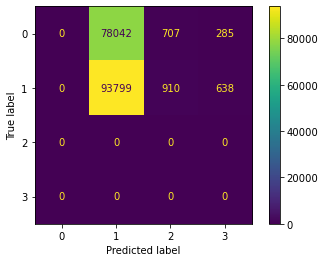

In [22]:
y_pred = model.predict(x_test, batch_size=100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred.argmax(axis=1)))
cm = confusion_matrix(y_test,y_pred.argmax(axis=1))
cm_display = ConfusionMatrixDisplay(cm).plot()


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision:', precision_score(y_test,y_pred.argmax(axis=1), average='micro'))
print('Recall:', recall_score(y_test,y_pred.argmax(axis=1), average='micro'))
print('F1:', f1_score(y_test,y_pred.argmax(axis=1), average='micro'))

Precision: 0.5378969039058155
Recall: 0.5378969039058155
F1: 0.5378969039058155
